### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food fit'

In [3]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'temperatures.csv'))

In [4]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
pd.set_option('precision', 0)

In [7]:
data.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2000,2000,?C,1.596,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2001,2001,?C,-0.569,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2002,2002,?C,1.640,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2003,2003,?C,2.536,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2004,2004,?C,2.744,Fc,Calculated data


In [8]:
data.shape

(170102, 14)

In [9]:
data.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [10]:
data.isnull().sum()

Domain Code             0
Domain                  0
Area Code (FAO)         0
Area                    0
Element Code            0
Element                 0
Months Code             0
Months                  0
Year Code               0
Year                    0
Unit                    0
Value               20040
Flag                13182
Flag Description    13182
dtype: int64

In [11]:
data['Value'].describe()

count   150062.000
mean         0.867
std          0.845
min         -9.303
25%          0.387
50%          0.700
75%          1.204
max         11.759
Name: Value, dtype: float64

In [12]:
data.shape

(170102, 14)

In [13]:
data['Value'].fillna(data['Value'].mean(),inplace=True)

In [14]:
data['Months'].value_counts()

January                10006
October                10006
Sep?Oct?Nov            10006
Jun?Jul?Aug            10006
Mar?Apr?May            10006
Dec?Jan?Feb            10006
December               10006
November               10006
September              10006
February               10006
August                 10006
July                   10006
June                   10006
May                    10006
April                  10006
March                  10006
Meteorological year    10006
Name: Months, dtype: int64

In [15]:
data['Months Code'].value_counts()

7001    10006
7010    10006
7019    10006
7018    10006
7017    10006
7016    10006
7012    10006
7011    10006
7009    10006
7002    10006
7008    10006
7007    10006
7006    10006
7005    10006
7004    10006
7003    10006
7020    10006
Name: Months Code, dtype: int64

In [16]:
# drop unnecessary columns, two ways to do so

data.drop(columns=['Area Code (FAO)','Flag','Flag Description','Domain Code','Year Code','Months Code','Element Code'],inplace=True)
#data.drop(['Unnamed: 0','_merge'],axis=1,inplace=True)

In [17]:
data.isnull().sum()

Domain     0
Area       0
Element    0
Months     0
Year       0
Unit       0
Value      0
dtype: int64

In [18]:
data.columns

Index(['Domain', 'Area', 'Element', 'Months', 'Year', 'Unit', 'Value'], dtype='object')

In [19]:
data2 = data.groupby(['Year'],as_index=True).median('Value')

In [20]:
data2.head()

,Value
Year,
2000,0.601
2001,0.713
2002,0.753
2003,0.736
2004,0.687


In [21]:
#  we set datetime index here

data2 = data2.reset_index()
data2['datetime'] = pd.to_datetime(data2['Year'], format='%Y').dt.strftime('%Y')
data2 = data2.set_index('datetime') # Set the datetime as the index of the dataframe.
data2.drop(['Year'], axis=1, inplace=True) # Drop columns
data2.head(10)

,Value
datetime,
2000,0.601
2001,0.713
2002,0.753
2003,0.736
2004,0.687
2005,0.761
2006,0.710
2007,0.742
2008,0.685


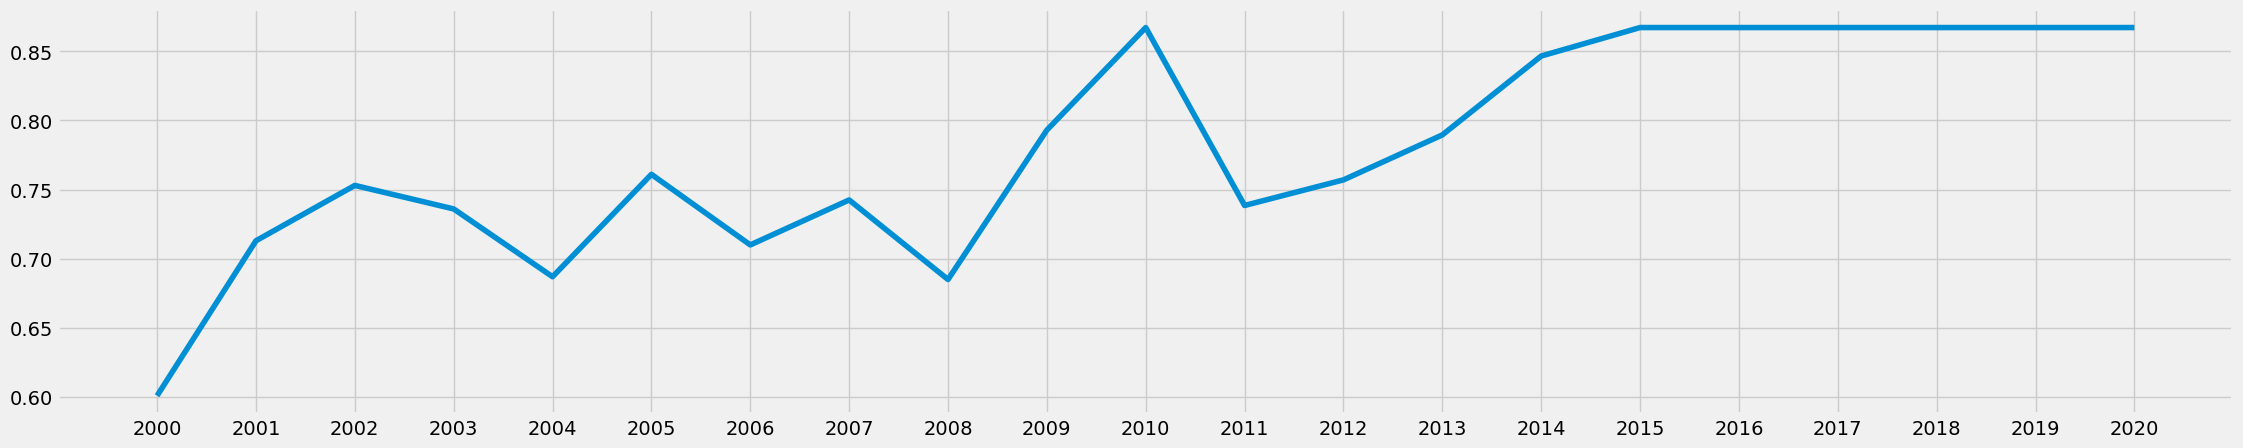

In [22]:
# Plot the new data set

plt.figure(figsize=(25,5), dpi=100)
plt.plot(data2)

In [23]:
# Decompose the time series using an additive model

#decomposition = sm.tsa.seasonal_decompose(df3, model='additive')
decomp = sm.tsa.seasonal_decompose(data2, freq=6)

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

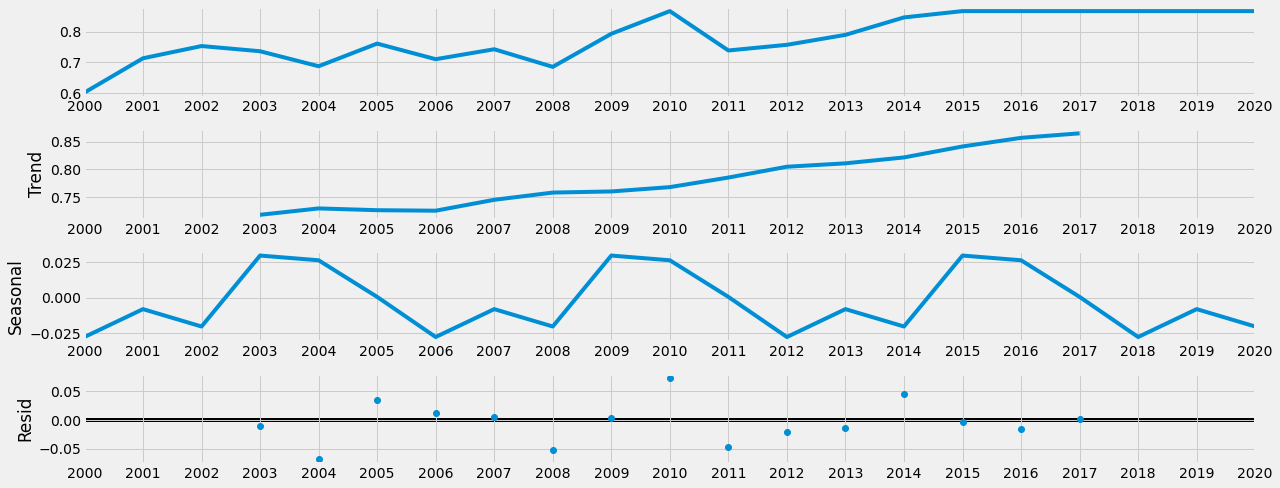

In [25]:
# Plot the separate components

decomp.plot()
plt.show()

### noise pretty small, consistent seasonal change, trend clearly visible

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 0.902
p-value                        0.993
Number of Lags Used            8.000
Number of Observations Used   12.000
Critical Value (1%)           -4.138
Critical Value (5%)           -3.155
Critical Value (10%)          -2.714
dtype: float64


### Test statistic is NOT smaller than %critical value =  null hypothesis not rejected
### H0 null hypothesis = Temperatures don't rise over the years

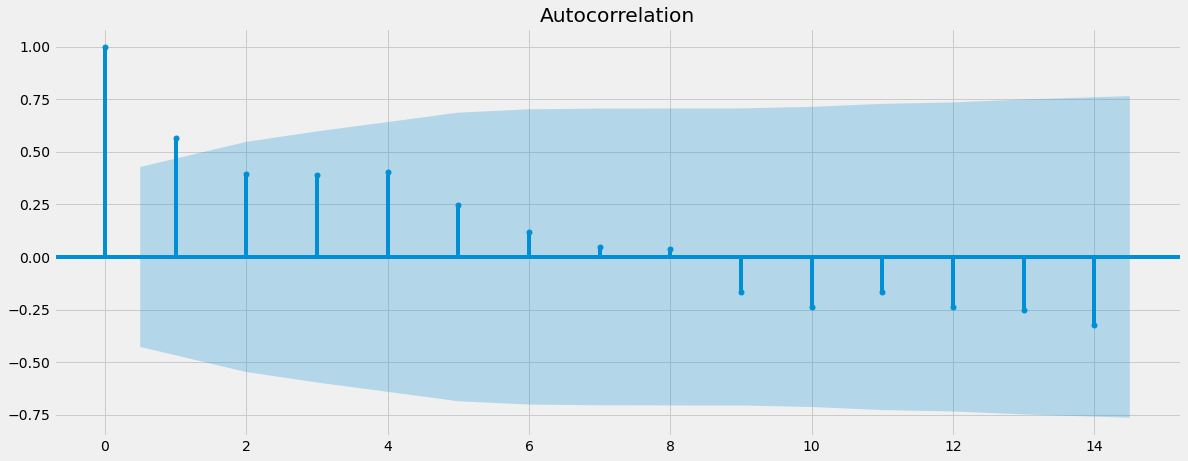

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data2)
plt.show()

In [28]:
data_diff = data2 - data2.shift(1)

In [29]:
data_diff.dropna(inplace=True)

In [30]:
data_diff.isnull().sum()

Value    0
dtype: int64

In [31]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.937
p-value                        0.776
Number of Lags Used            8.000
Number of Observations Used   11.000
Critical Value (1%)           -4.223
Critical Value (5%)           -3.189
Critical Value (10%)          -2.730
dtype: float64


In [32]:
data_diff2 = data_diff - data_diff.shift(1)

In [33]:
data_diff2.dropna(inplace=True)

In [34]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.994
p-value                        0.000
Number of Lags Used            7.000
Number of Observations Used   11.000
Critical Value (1%)           -4.223
Critical Value (5%)           -3.189
Critical Value (10%)          -2.730
dtype: float64


# after removing the trend line data is stationary and test statistic is smaller than 1% critical which means 99% confidency -> we can reject the null hypothesis
# H0: Temperatures don't rise over the years